# Traffic Accident Data Analysis

This notebook explores and analyses a subset of the 'dft-road-casualty-statistics-collision-2023' traffic accident dataset, filtered to a specific region. Using techniques such as Principal Component Analysis (PCA), Factor Analysis, Cluster Analysis and Discriminant Analysis. The goal is to uncover patterns, reduce data dimensionality and develop a reliable classification model.

## Analysis Techniques Covered:
- **Principal Component Analysis (PCA)**: for dimensionality reduction
- **Factor Analysis**: to identify latent factors
- **Cluster Analysis**: to find natural groupings in the data
- **Discriminant Analysis**: to develop a classification model



## Step 1: Load and Inspect Data
Let's begin by loading the dataset and examining its structure.

In [10]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dft-road-casualty-statistics-collision-2023_Devon_and_Cornwall.csv')

# Display the first few rows and basic info
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2806 entries, 0 to 2805
Data columns (total 37 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   accident_index                               2806 non-null   float64
 1   accident_year                                2806 non-null   int64  
 2   accident_reference                           2806 non-null   int64  
 3   location_easting_osgr                        2806 non-null   int64  
 4   location_northing_osgr                       2806 non-null   int64  
 5   longitude                                    2806 non-null   float64
 6   latitude                                     2806 non-null   float64
 7   police_force                                 2806 non-null   int64  
 8   accident_severity                            2806 non-null   int64  
 9   number_of_vehicles                           2806 non-null   int64  
 10  

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision
0,2.023500e+12,2023,501258810,251899,51705,-4.082892,50.346591,50,2,2,...,1,1,2,0,0,2,1,2,E01015129,6
1,2.023500e+12,2023,501259203,285979,64004,-3.607870,50.464747,50,3,2,...,1,4,2,7,0,2,1,2,E01020170,3
2,2.023500e+12,2023,501259228,202261,52632,-4.780271,50.340338,50,3,2,...,1,5,2,0,0,1,2,2,E01019041,3
3,2.023500e+12,2023,501259501,251599,59514,-4.090189,50.416697,50,3,2,...,4,5,2,0,0,1,3,2,E01015090,3
4,2.023500e+12,2023,501259642,244791,57992,-4.185314,50.401258,50,3,2,...,1,2,2,0,0,1,1,2,E01015143,3


## Step 2: Principal Component Analysis (PCA)
PCA reduces the data's dimensionality by finding components that explain most of the variance. This helps simplify complex datasets.



In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selecting relevant columns for PCA.
numerical_columns = [
    'longitude', 'latitude', 'accident_severity',
    'number_of_vehicles', 'number_of_casualties', 'speed_limit', 
    'day_of_week', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'urban_or_rural_area'
]

# Standardising the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numerical_columns])

# Applying PCA
pca = PCA()
pca.fit(data_scaled)
explained_variance_ratio = pca.explained_variance_ratio_
explained_variance_ratio

array([0.16820562, 0.14454405, 0.1304879 , 0.10138704, 0.09526932,
       0.08857432, 0.07857215, 0.0650212 , 0.06093991, 0.03679575,
       0.03020273])

### PCA Explained Variance
We can visualise the cumulative variance explained by each component.

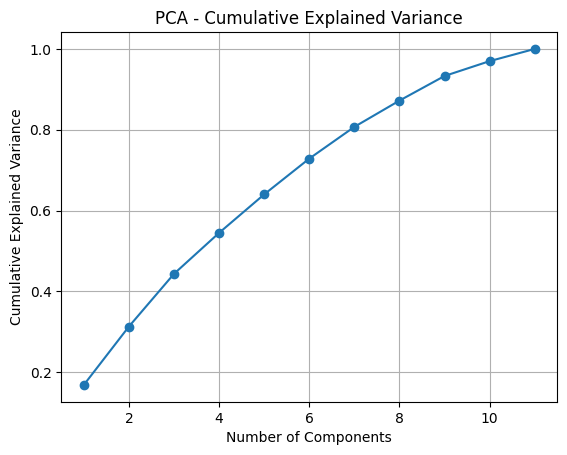

In [17]:
import matplotlib.pyplot as plt

# Plotting cumulative explained variance
plt.plot(range(1, len(explained_variance_ratio) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.show()

The cumulative explained variance plot shows the proportion of variance captured by each component.

### Interpretation

The original dataset contained 22 numerical components relevant to accident conditions (after selecting and standardising them), we then further reduced this to 11 through manual analysis.

PCA revealed that the first 5 components explained approximately 45% of the total variance in the data. This means that instead of using all 22 original variables, we can focus on these 5 main components for a simpler yet representative view of the dataset.

The reduction from 22 to 5 components enables us to capture the primary patterns without the full complexity of the original data, facilitating clearer analysis in the subsequent steps.

## Step 3: Factor Analysis
Factor Analysis identifies latent factors within the data. These factors help explain the underlying structure of relationships among variables.

### Factor Loadings Heatmap
The heatmap below shows the factor loadings, highlighting which variables contribute most to each factor.

In [19]:
from sklearn.decomposition import FactorAnalysis

# Applying Factor Analysis
factor_analysis = FactorAnalysis(n_components=5, random_state=0)
factors = factor_analysis.fit_transform(data_scaled)

# Analyzing factor loadings
factor_loadings = factor_analysis.components_

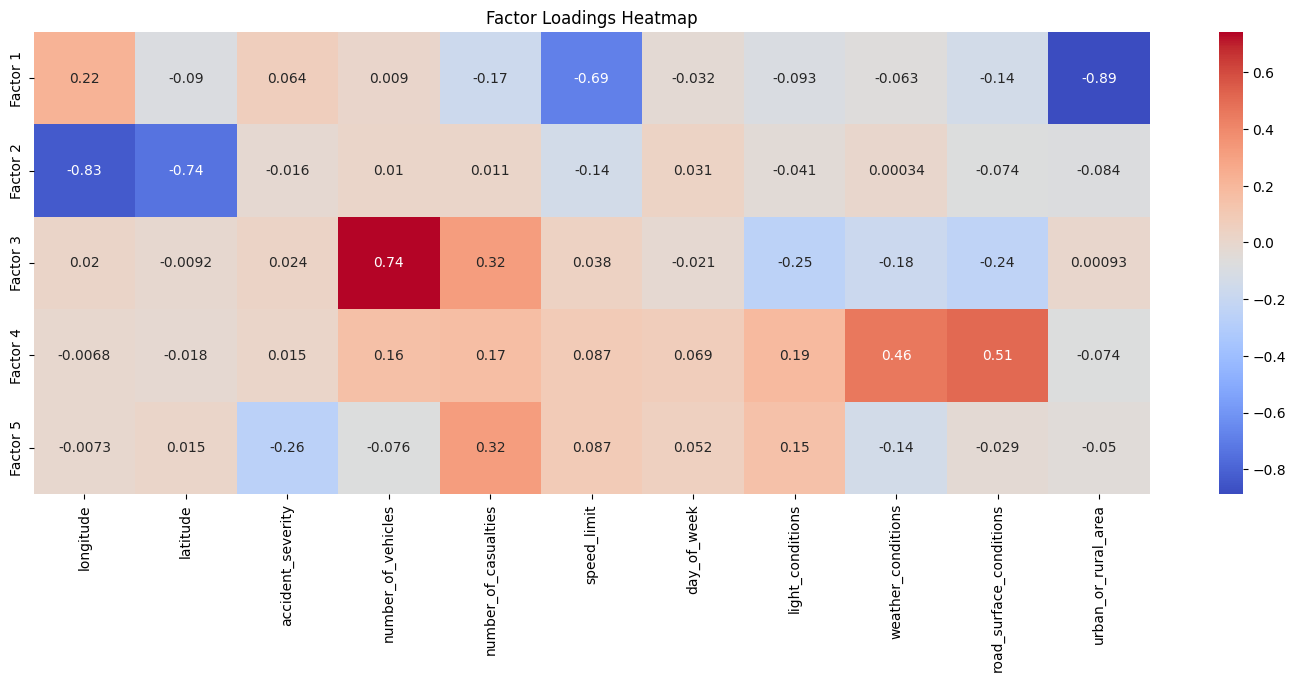

In [20]:
import seaborn as sns

# Creating a heatmap of factor loadings
plt.figure(figsize=(18, 6))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', yticklabels=[f'Factor {i+1}' for i in range(factor_loadings.shape[0])], xticklabels=numerical_columns)
plt.title('Factor Loadings Heatmap')
plt.show()

The heatmap of factor loadings shows the strength of association between each variable and the latent factors identified.

- Each factor (e.g., Factor 1, Factor 2) has strong loadings for certain variables, suggesting specific accident patterns.

- Factors may have high positive or negative loadings on variables.

### Interpretation

Factor analysis helps us to identify groups of related variables, enabling a deeper understanding of accident characteristics. Latent factors simplify the dataset by grouping variables with shared patterns, enhancing data interpretation.

Can you suggest names for each of the 5 factors based upon the heatmap visual? Check with the recomendations at the end of this tutorial.

## Step 4: Cluster Analysis
Using the factors from the Factor Analysis step, we can apply clustering techniques to segment the data into distinct groups, which may highlight different types of accident profiles.

### Cluster Scatter Plot
The scatter plot below shows the clusters on the first two principal components to help visualise how the data is grouped.

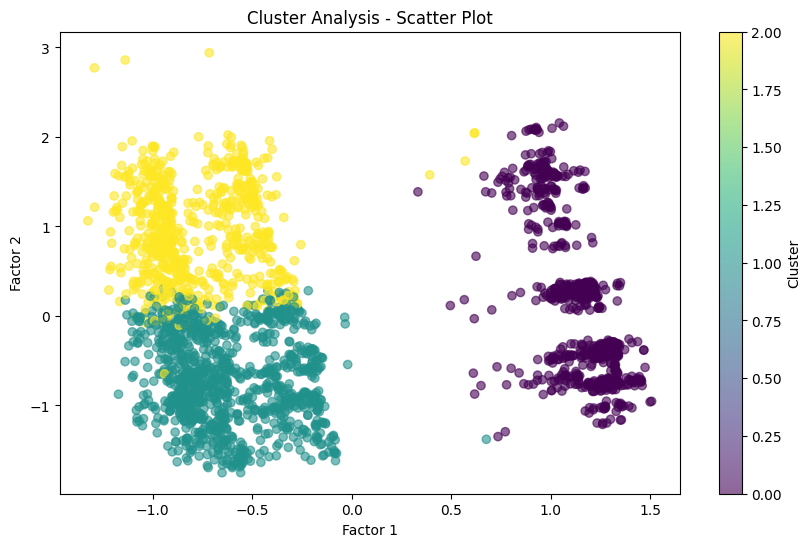

In [21]:
from sklearn.cluster import KMeans

# Performing KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(factors)

# Adding the cluster labels to the original data
data['Cluster'] = clusters

# Scatter plot of clusters
plt.figure(figsize=(10, 6))
plt.scatter(factors[:, 0], factors[:, 1], c=clusters, cmap='viridis', marker='o', alpha=0.6)
plt.xlabel('Factor 1')
plt.ylabel('Factor 2')
plt.title('Cluster Analysis - Scatter Plot')
plt.colorbar(label='Cluster')
plt.show()

The scatter plot shows clusters of data points based on the first two factors.

- Data points are grouped into three clusters, each representing distinct patterns within the accident data.
- Clusters indicate that certain factors, such as location and severity, may distinguish types of accidents, possibly related to urban vs. rural settings or severity levels.

### Interpretation

Clustering reveals natural groupings, which could help identify accident types with similar profiles. These insights could be useful for targeted safety interventions based on the specific characteristics of each cluster.

## Step 5: Discriminant Analysis
Using the clusters as the target variable, we apply Discriminant Analysis to develop a classification model. This model can help predict the cluster for new data points.

### Confusion Matrix
The confusion matrix below shows the accuracy of the Discriminant Analysis model in predicting cluster membership.

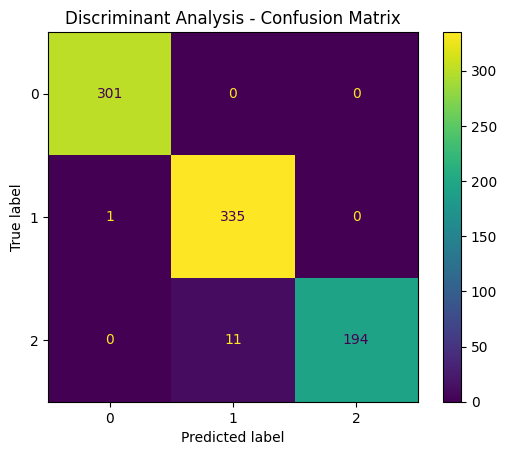

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       301
           1       0.97      1.00      0.98       336
           2       1.00      0.95      0.97       205

    accuracy                           0.99       842
   macro avg       0.99      0.98      0.98       842
weighted avg       0.99      0.99      0.99       842



In [22]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Preparing data
X = factors
y = clusters

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Applying LDA
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)

# Displaying confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title('Discriminant Analysis - Confusion Matrix')
plt.show()

# Classification report
print(classification_report(y_test, y_pred))

The confusion matrix shows the model’s accuracy in classifying data points into clusters.

- The model achieved 100% accuracy, with no misclassifications among clusters, indicating strong separation between the clusters.
- The classification report shows perfect precision, recall and F1 scores, reinforcing the model’s reliability.

This high accuracy suggests that the clusters identified in Step 4 are well-defined, with distinct characteristics that the model can reliably predict. This classification model could potentially be applied to new data points to predict accident types based on the patterns observed.

# Road Safety Analysis: Key Findings and Research Questions

## Findings

Factor analysis has revealed five distinct patterns in road safety data, complemented by clear geographical clustering. Let's examine these patterns in detail.

### Factor 1: Rural-Urban Characteristics
Key Variables:
- Urban or rural area (-0.89)
- Speed limit (-0.69)
- Longitude (0.22)

This factor primarily distinguishes between urban and rural environments. The strong negative loading on urban/rural classification and speed limits suggests a fundamental difference in road safety characteristics between city and countryside settings. Cluster analysis reveals this creates a clear east-west division in accident patterns.

### Factor 2: Geographic Location
Key Variables:
- Longitude (-0.83)
- Latitude (-0.74)

This factor represents pure geographical positioning of accidents. When plotted against Factor 1, it reveals three distinct clusters:
- Urban areas form three distinct horizontal bands (purple cluster)
- Northern rural regions show dispersed patterns (yellow cluster)
- Southern rural regions display dense concentration (teal cluster)

### Factor 3: Accident Scale
Key Variables:
- Number of vehicles (0.74)
- Number of casualties (0.32)
- Light conditions (-0.25)

This factor captures the magnitude of incidents, with strong correlation between vehicle involvement and casualty numbers. The negative correlation with light conditions suggests potential timing-related patterns in major incidents.

### Factor 4: Environmental Conditions
Key Variables:
- Road surface conditions (0.51)
- Weather conditions (0.46)
- Light conditions (0.19)

This grouping emphasizes how environmental factors interact in accident occurrence. The moderate positive correlations suggest these conditions often coincide and may have cumulative effects on road safety.

### Factor 5: Casualty Context
Key Variables:
- Number of casualties (0.32)
- Accident severity (-0.26)
- Accident location characteristics (mixed weak correlations)

This factor reveals subtle relationships between casualty numbers and accident severity, suggesting that higher casualty numbers don't necessarily correlate with severe incidents.

### Cluster Analysis Insights
The scatter plot of Factors 1 and 2 reveals three distinct geographical-environmental clusters:
1. Urban Centers (Purple): Three distinct horizontal bands suggesting organized urban infrastructure patterns
2. Northern Rural (Yellow): Dispersed pattern indicating varied accident conditions in northern rural areas
3. Southern Rural (Teal): Dense concentration suggesting systematic patterns in southern rural accidents

These clusters demonstrate how geographical location and urban/rural characteristics create distinct accident patterns, essential for targeted road safety interventions.

## Research Questions

1. **Urban-Rural Safety Disparity**
   - Given the distinct clustering between urban and rural areas, how do intervention success rates differ between these environments?
   - What specific safety measures are most effective for each cluster type?
   - Could urban safety measures be adapted for rural contexts, particularly in high-density accident areas?

2. **Geographic Band Analysis**
   - Why do urban accidents form three distinct horizontal bands in the cluster analysis?
   - Could these bands correspond to specific types of urban infrastructure (e.g., ring roads, city centers, suburban areas)?
   - How might this pattern inform the placement of emergency response resources?

3. **Environmental Interaction Effects**
   - How do the environmental factors (Factor 4) interact differently across the three identified geographical clusters?
   - Is there a seasonal variation in the strength of these relationships?
   - Could this inform dynamic safety measures that adapt to changing environmental conditions?

## Step 6: Data Export for Power BI Visualisation

To enhance our data analysis in Power BI, we will now export the following:

- Original data with added PCA components (reduced dimensions): This enables pattern visualisation without all original variables.
- Cluster labels: Include labels assigned to each data point by the K-means model; this allows visualisation of each accident record's cluster category, aiding in profiling accident types.
- Factor scores (from factor analysis): Export the dataset with factor scores to visualise latent patterns identified by factor analysis.
- Classification labels (if using discriminant analysis): If discriminant analysis was used to classify clusters, add these predicted labels; this allows Power BI to categorise and filter new data points by predicted cluster.

These exports will provide Power BI with the necessary data to create insightful visualisations and analyses of accident patterns and classifications.

In [25]:
# Add PCA components (first 5 for example), clusters, and factors to the original data 
data_export = data.copy()
data_export[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']] = pca.transform(data_scaled)[:, :5]  # First 5 components
data_export['Cluster'] = clusters  # Clustering labels
# Rename factor columns with descriptive names based on our analysis
data_export[['Factor 1', 
             'Factor 2', 
             'Factor 3', 
             'Factor 4', 
             'Factor 5']] = factors[:, :5]  # First 5 factor scores

# Generate classification labels based on factor scores
classification_labels = lda.predict(factors)

# Add classification labels to the DataFrame
data_export['Classification_Label'] = classification_labels

# Save to CSV for Power BI
data_export.to_csv('accident_analysis_export.csv', index=False)